# Introduction
This notebook demonstrates 4 clustering methods - K-Means, Mean Shift, Spectral Clustering and Affinity Propagation - with 3 different blob configurations.  The organization is as follows:  
1.  Blob config number 1
2.  Blob config number 2  
3.  Blob config number 3  


In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

#### Blob configuration #1 (changed the 'cluster_std' from 1 to 3.

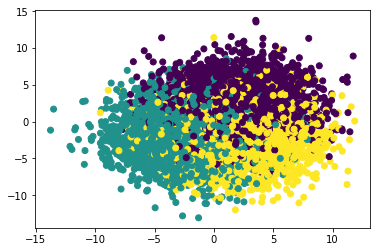

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=3,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 1.1 - Mean Shift  

Mean Shift determines the number of clusters.

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1


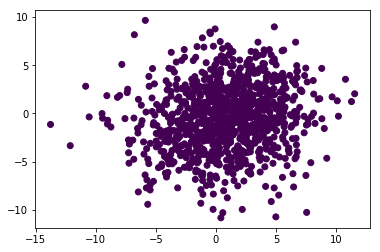

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

**Evaluation:** Even though the initial data created 3 clusters, since the standard deviation was set to 3, the mean shift method estimated the number of clusters to 1.  Therefore all of the test data points belong to the one cluster.  

#### 1.2 - Spectral Clustering

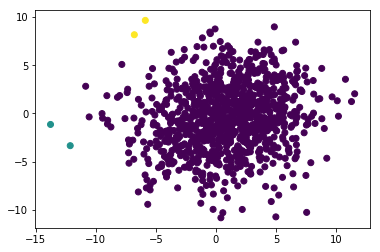

Comparing the assigned categories to the ones in the data:
col_0    0  1  2
row_0           
0      360  0  2
1      318  2  0
2      318  0  0


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

**Evaluation:**  This is interesting.  We defined 3 clusters and it chose a couple of oulier values as the grouping for the 2nd and 3rd clusters.  

#### 1.3 - Affinity Propogation  

Affinity Propogation determines the number of clusters.

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 39


Graph the results.

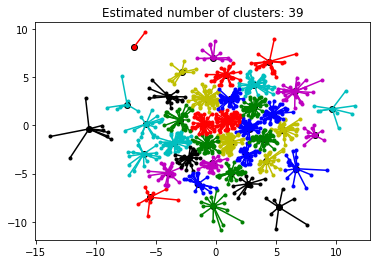

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Evaluation:**  It chose to represent the data with 39 clusters.  Seems a little high.

#### 1.4 - K-Means

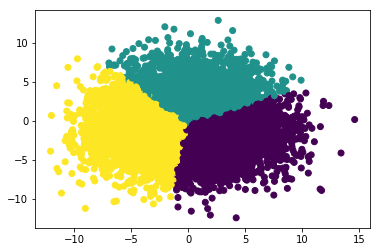

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      2183   416   644
1       789   599  1886
2       362  2318   803


In [8]:
# Normalize the data.
# X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

**Evaluation:**  This doesn't look that great.  The accuracy is 0.3585; in other words, it is correctly classifying about 36% of the data points correctly.

#### Blob configuration #2 (changed the 'cluster_std' from 1 to 0.3

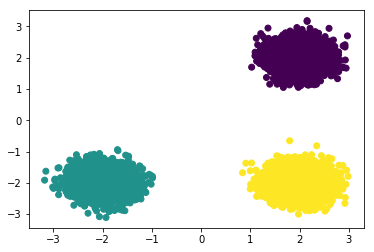

In [9]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=0.3,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 2.1 - Mean Shift

In [10]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


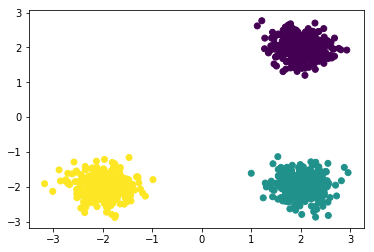

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    0  320
2        0  318    0


In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

**Evaluation:** Correctly identified all 3 clusters, however, it looks like the data point for clusters 1 and 2 were assigned incorrectly.  **Correction:**  cluster 0 is assigned to outcome 0; cluster 1 is assigned to outcome 2; cluster 2 is assigned to outcome 1. 

#### 2.2 - Spectral Clustering

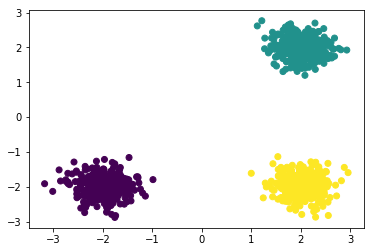

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  362    0
1      320    0    0
2        0    0  318


In [12]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

**Evaluation:** Correctly identified all 3 clusters and correctly assigned all data points to the correct cluster.  Cluster 0 would be assigned outcome 1; cluster 1 would be assigned outcome 0; cluster 2 would be assigned outcome 2.

#### 2.3 - Affinity Propagation

In [13]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 925


**Evaluation:** This again is way too many clusters.  It just doesn't make sense.

#### 2.4 - K-Means

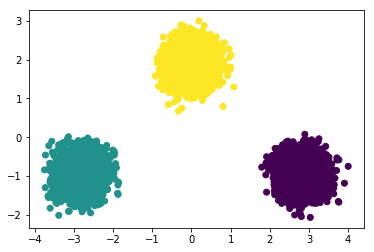

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      3334     0     0
1         0  3333     0
2         0     0  3333


In [14]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

**Evaluation:** This looks great.  It classified everything correctly.  Cluster 0 would be assigned to outcome 0; cluster 1 would be assigned to outcome 1; cluster 2 would be assigned to outcome 2.

#### Blob configuration #3 (changed the coordinates of the centers)

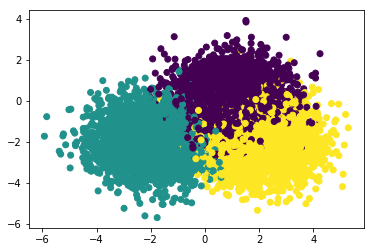

In [15]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[1, 0], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

#### 3.1 - Mean Shift

In [16]:
# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 2


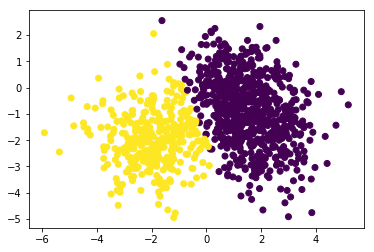

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      346   16
1       13  307
2      311    7


In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

**Evaluation:** This looks pretty good.  The data points clearly fall into one of the two clusters.

#### 3.2 - Spectral Clustering

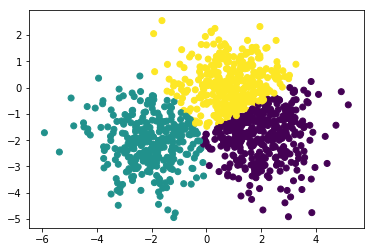

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       63    4  295
1       10  293   17
2      286    4   28


In [18]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

**Evaluation:**  We defined the 3 clusters.  The accuracy is not great; it correctly classified 384 data points out of 1000 for a percentage of 38.4%.  Cluster 0 would be assigned outome 2; cluster 1 would be assigned outcome 1; cluster 2 would be assigned outcome 0.

#### 3.3 - Affinity Propogation

In [19]:
# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 34


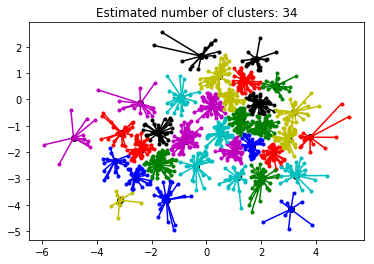

In [20]:
plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Evaluation:** Thirty-four is probably too many clusters again.  This does not seem too useful.  

#### 3.4 - K-Means

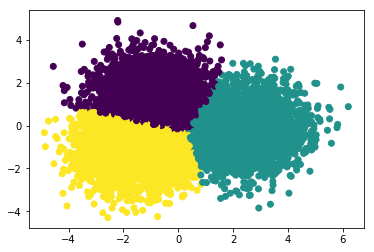

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      2781    79   373
1       120  3203    74
2       433    51  2886


In [21]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

**Evaluation:**  This looks pretty good.  It correctly classified 8870 out of 10,000 or 88.7%.  Cluster 0 would be assigned outcome 0; cluster 1 would be assigned outcome 1; cluster 2 would be assigned outcome 2.